In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Part 1 - Data Preprocessing
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [3]:
training_set.shape

(1258, 1)

In [4]:
dataset_train.shape

(1258, 6)

In [5]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [6]:
X_train.shape

(1198, 60)

In [7]:
y_train.shape

(1198,)

In [8]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1198, 60, 1)

In [9]:
# Part 2 - Building the RNN
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [10]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 60, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 70, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 75))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))


In [35]:
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 60)            26640     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 60, 70)            36680     
_________________________________________________________________
dropout_3 (Dropout)          (None, 60, 70)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 75)               

In [11]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [12]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 16)

Epoch 1/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0365
Epoch 2/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0056
Epoch 3/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0049
Epoch 4/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0042
Epoch 5/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0039
Epoch 6/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0042
Epoch 7/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0039
Epoch 8/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0043
Epoch 9/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0039
Epoch 10/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0038
Epoch 11/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0038
Epoch 12/100
1198/1198 [==============================] - 11s 9ms/step - l

C:\Users\admin\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.288994). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 192/1198 [===>..........................] - ETA: 14s - loss: 0.0022

C:\Users\admin\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.249941). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
C:\Users\admin\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.210887). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1198/1198 [==============================] - 11s 9ms/step - loss: 0.0024
Epoch 42/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0022
Epoch 43/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0021
Epoch 44/100
1198/1198 [==============================] - 10s 9ms/step - loss: 0.0022
Epoch 45/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0022
Epoch 46/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0022
Epoch 47/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0020
Epoch 48/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0022
Epoch 49/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0020
Epoch 50/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0018
Epoch 51/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0020
Epoch 52/100
1198/1198 [==============================] - 7s 6ms/step - los

C:\Users\admin\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.359277). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


  96/1198 [=>............................] - ETA: 14s - loss: 0.0014    

C:\Users\admin\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.281178). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1198/1198 [==============================] - 10s 8ms/step - loss: 0.0013
Epoch 98/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0014
Epoch 99/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0012
Epoch 100/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0012


In [13]:
# Part 3 - Making the predictions and visualising the results
# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [14]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
#1278= 1258 + 20

In [15]:
dataset_total.shape

(1278,)

In [31]:
len(dataset_total)- len(dataset_test)-60
#1278-20-60

1198

In [16]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

In [17]:
inputs.shape

(80,)

In [18]:
inputs = inputs.reshape(-1,1)

In [19]:
inputs.shape

(80, 1)

In [20]:
inputs = sc.transform(inputs)

In [21]:
inputs.shape

(80, 1)

In [22]:
inputs

array([[0.9299055 ],
       [0.93113327],
       [0.92750577],
       [0.94415507],
       [0.93876032],
       [0.93403527],
       [0.93483518],
       [0.9313937 ],
       [0.94636878],
       [0.96569685],
       [0.97510976],
       [0.95966962],
       [0.97808617],
       [1.        ],
       [0.98076494],
       [0.97083116],
       [0.98450406],
       [0.96054394],
       [0.9371419 ],
       [0.92841729],
       [0.90804747],
       [0.8771858 ],
       [0.92153434],
       [0.93809063],
       [0.93165414],
       [0.95254483],
       [0.88812412],
       [0.88637547],
       [0.87032145],
       [0.88563137],
       [0.90743359],
       [0.91571173],
       [0.89941588],
       [0.91805566],
       [0.9089404 ],
       [0.9024853 ],
       [0.89456061],
       [0.91600938],
       [0.9132934 ],
       [0.88979835],
       [0.86589404],
       [0.89030062],
       [0.90335962],
       [0.89642086],
       [0.91777662],
       [0.93176576],
       [0.94114145],
       [0.957

In [42]:
inputs[0:1, 0]

array([0.9299055])

In [45]:
inputs[0:60, 0]

array([0.9299055 , 0.93113327, 0.92750577, 0.94415507, 0.93876032,
       0.93403527, 0.93483518, 0.9313937 , 0.94636878, 0.96569685,
       0.97510976, 0.95966962, 0.97808617, 1.        , 0.98076494,
       0.97083116, 0.98450406, 0.96054394, 0.9371419 , 0.92841729,
       0.90804747, 0.8771858 , 0.92153434, 0.93809063, 0.93165414,
       0.95254483, 0.88812412, 0.88637547, 0.87032145, 0.88563137,
       0.90743359, 0.91571173, 0.89941588, 0.91805566, 0.9089404 ,
       0.9024853 , 0.89456061, 0.91600938, 0.9132934 , 0.88979835,
       0.86589404, 0.89030062, 0.90335962, 0.89642086, 0.91777662,
       0.93176576, 0.94114145, 0.95762334, 0.96413424, 0.96402262,
       0.96971501, 0.95077759, 0.96294367, 0.96123223, 0.95475854,
       0.95204256, 0.95163331, 0.95725128, 0.93796041, 0.93688146])

In [46]:
inputs[1:61, 0]

array([0.93113327, 0.92750577, 0.94415507, 0.93876032, 0.93403527,
       0.93483518, 0.9313937 , 0.94636878, 0.96569685, 0.97510976,
       0.95966962, 0.97808617, 1.        , 0.98076494, 0.97083116,
       0.98450406, 0.96054394, 0.9371419 , 0.92841729, 0.90804747,
       0.8771858 , 0.92153434, 0.93809063, 0.93165414, 0.95254483,
       0.88812412, 0.88637547, 0.87032145, 0.88563137, 0.90743359,
       0.91571173, 0.89941588, 0.91805566, 0.9089404 , 0.9024853 ,
       0.89456061, 0.91600938, 0.9132934 , 0.88979835, 0.86589404,
       0.89030062, 0.90335962, 0.89642086, 0.91777662, 0.93176576,
       0.94114145, 0.95762334, 0.96413424, 0.96402262, 0.96971501,
       0.95077759, 0.96294367, 0.96123223, 0.95475854, 0.95204256,
       0.95163331, 0.95725128, 0.93796041, 0.93688146, 0.92955205])

In [47]:
inputs[2:62, 0]

array([0.92750577, 0.94415507, 0.93876032, 0.93403527, 0.93483518,
       0.9313937 , 0.94636878, 0.96569685, 0.97510976, 0.95966962,
       0.97808617, 1.        , 0.98076494, 0.97083116, 0.98450406,
       0.96054394, 0.9371419 , 0.92841729, 0.90804747, 0.8771858 ,
       0.92153434, 0.93809063, 0.93165414, 0.95254483, 0.88812412,
       0.88637547, 0.87032145, 0.88563137, 0.90743359, 0.91571173,
       0.89941588, 0.91805566, 0.9089404 , 0.9024853 , 0.89456061,
       0.91600938, 0.9132934 , 0.88979835, 0.86589404, 0.89030062,
       0.90335962, 0.89642086, 0.91777662, 0.93176576, 0.94114145,
       0.95762334, 0.96413424, 0.96402262, 0.96971501, 0.95077759,
       0.96294367, 0.96123223, 0.95475854, 0.95204256, 0.95163331,
       0.95725128, 0.93796041, 0.93688146, 0.92955205, 0.94731751])

In [23]:
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)

In [24]:
X_test.shape

(20, 60)

In [25]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [26]:
X_test.shape

(20, 60, 1)

In [27]:
predicted_stock_price = regressor.predict(X_test)

In [28]:
predicted_stock_price

array([[0.9180099 ],
       [0.91294813],
       [0.9150994 ],
       [0.9170563 ],
       [0.92269814],
       [0.9330745 ],
       [0.9407339 ],
       [0.942327  ],
       [0.94318247],
       [0.94435513],
       [0.94553375],
       [0.9460584 ],
       [0.9463024 ],
       [0.9478123 ],
       [0.9494679 ],
       [0.9592817 ],
       [0.9711542 ],
       [0.9826728 ],
       [0.98680425],
       [0.9759661 ]], dtype=float32)

In [29]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [30]:
predicted_stock_price 

array([[772.60535],
       [769.8844 ],
       [771.0408 ],
       [772.0928 ],
       [775.1256 ],
       [780.7035 ],
       [784.8209 ],
       [785.6773 ],
       [786.13715],
       [786.7675 ],
       [787.4011 ],
       [787.6831 ],
       [787.8143 ],
       [788.626  ],
       [789.5159 ],
       [794.79144],
       [801.17365],
       [807.3656 ],
       [809.5865 ],
       [803.7603 ]], dtype=float32)

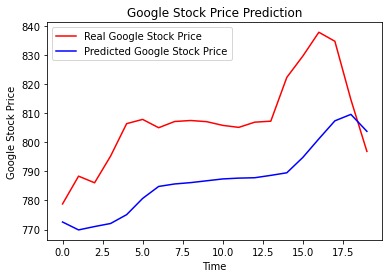

In [31]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()